In [40]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hcl
from scipy.spatial.distance import squareform

In [68]:

Traj=md.load("/net/jam-amaro-shared/bccgc4/Strided_Traj/joined_traj_stride10.xtc", top= "protein.h5")
selection=Traj.topology.select("protein")
traj=Traj.atom_slice(selection)
selection=traj.topology.select("resid 166 or resid 71 or resid 212 or resid 164 or resid 73 or resid 165")
print(selection)
active_site=md.compute_neighbors(traj[0], 0.8, selection)
#print(active_site)
#print(traj)
print(np.size(active_site))
traj=traj.atom_slice(active_site[0])

[1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1065 1066 1067 1068 1069 1070 1071 1072
 1073 1074 1075 1076 1077 1078 2475 2476 2477 2478 2479 2480 2481 2482
 2483 2484 2485 2486 2487 2488 2489 2490 2491 2492 2493 2494 2495 2496
 2497 2498 2499 2500 2501 2502 2503 2504 2505 2506 2507 2508 2509 2510
 2511 2512 3204 3205 3206 3207 3208 3209 3210 3211 3212 3213 3214 3215
 3216 3217 3218 3219 3220 3221 3222 3223]
921


In [42]:
print(traj)
heavy=traj.topology.select("symbol != H")
traj=traj.atom_slice(heavy)
print(traj)


<mdtraj.Trajectory with 35000 frames, 921 atoms, 92 residues, and unitcells>
<mdtraj.Trajectory with 35000 frames, 487 atoms, 88 residues, and unitcells>


In [44]:
strided_traj=traj[::5]

In [79]:
distances = np.empty((strided_traj.n_frames, strided_traj.n_frames))
for i in range(strided_traj.n_frames):
    distances[i] = md.rmsd(strided_traj, strided_traj, i)
print('Max pairwise rmsd: %f nm' % np.max(distances))
print(distances)

Max pairwise rmsd: 0.212739 nm
[[0.         0.09019616 0.08511469 ... 0.13778631 0.1420985  0.13792813]
 [0.09019616 0.         0.07604224 ... 0.14945941 0.14462757 0.1422466 ]
 [0.08511469 0.07604224 0.         ... 0.13924305 0.14137875 0.13237913]
 ...
 [0.13778631 0.14945941 0.13924305 ... 0.         0.10518809 0.07981363]
 [0.14209762 0.14462757 0.14137875 ... 0.10518809 0.         0.08664265]
 [0.13792813 0.1422466  0.13237913 ... 0.07981363 0.08664265 0.        ]]


In [94]:
print(distances)
print(np.size(distances))

[[0.         0.09019616 0.08511469 ... 0.13778631 0.1420985  0.13792813]
 [0.09019616 0.         0.07604224 ... 0.14945941 0.14462757 0.1422466 ]
 [0.08511469 0.07604224 0.         ... 0.13924305 0.14137875 0.13237913]
 ...
 [0.13778631 0.14945941 0.13924305 ... 0.         0.10518809 0.07981363]
 [0.14209762 0.14462757 0.14137875 ... 0.10518809 0.         0.08664265]
 [0.13792813 0.1422466  0.13237913 ... 0.07981363 0.08664265 0.        ]]
49000000


In [82]:
#assert np.all(distances - distances.T < 1e-6)
reduced_distances = squareform(distances, checks=False)
print(np.max(reduced_distances))


0.21273870766162872


In [92]:
print(distances-distances.T)

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   8.7916851e-07  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-8.7916851e-07  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]


In [95]:
assert np.all(distances - distances.T < 1e-5) !!!!!!!##### um

In [83]:
linkage = hcl.linkage(reduced_distances, method='average')

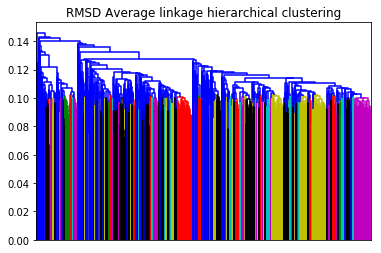

In [48]:
plt.title('RMSD Average linkage hierarchical clustering')
_ = hcl.dendrogram(linkage, no_labels=True, count_sort='descendent')

In [49]:
print(linkage)

[[2.80000000e+03 5.60000000e+03 5.79855405e-02 2.00000000e+00]
 [2.77900000e+03 2.78000000e+03 5.90690747e-02 2.00000000e+00]
 [2.59900000e+03 2.60200000e+03 5.91305718e-02 2.00000000e+00]
 ...
 [2.28000000e+02 1.39950000e+04 1.42039450e-01 6.94000000e+03]
 [1.36440000e+04 1.39960000e+04 1.42766675e-01 6.94200000e+03]
 [1.39830000e+04 1.39970000e+04 1.45939471e-01 7.00000000e+03]]


In [50]:
Z= hcl.linkage(reduced_distances, method="average")

In [91]:
f=0

for i in range(1,10000):
    f=f+0.0001
    clusters=hcl.fcluster(Z, float(f),criterion="distance")
    #print(max(clusters))
    if max(clusters)==20:
        print(f)
        break
        
clusters=hcl.fcluster(Z, float(f),criterion="distance")
print(clusters)
print(max(clusters))
print(min(clusters))

0.1256000000000025
[16 16 16 ...  8  8  8]
20
1


In [86]:
print(cutoff)

0


In [ ]:
float=0

In [65]:
Clusters={}

for count in range(1,21):
    frames=[]
    indices = [d for d, x in enumerate(clusters) if x == count]
    frames.append(indices)
    Clusters[count]=frames
   
#print(Clusters)


In [69]:
for key in Clusters:
    print(key)
    a=Traj[Clusters[key]]
    print(a)
    a.save_xtc('RMSD_Traj/Trajcluster'+str(key)+".xtc")


1
<mdtraj.Trajectory with 2 frames, 3324 atoms, 220 residues, and unitcells>
2
<mdtraj.Trajectory with 56 frames, 3324 atoms, 220 residues, and unitcells>
3
<mdtraj.Trajectory with 2 frames, 3324 atoms, 220 residues, and unitcells>
4
<mdtraj.Trajectory with 2 frames, 3324 atoms, 220 residues, and unitcells>
5
<mdtraj.Trajectory with 9 frames, 3324 atoms, 220 residues, and unitcells>
6
<mdtraj.Trajectory with 3 frames, 3324 atoms, 220 residues, and unitcells>
7
<mdtraj.Trajectory with 2 frames, 3324 atoms, 220 residues, and unitcells>
8


/opt/anaconda3/lib/python3.6/site-packages/mdtraj/core/trajectory.py:1118: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  xyz = self.xyz[key]
/opt/anaconda3/lib/python3.6/site-packages/mdtraj/core/trajectory.py:1119: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  time = self.time[key]
/opt/anaconda3/lib/python3.6/site-packages/mdtraj/core/trajectory.py:1123: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array in

<mdtraj.Trajectory with 793 frames, 3324 atoms, 220 residues, and unitcells>
9
<mdtraj.Trajectory with 4 frames, 3324 atoms, 220 residues, and unitcells>
10
<mdtraj.Trajectory with 4 frames, 3324 atoms, 220 residues, and unitcells>
11
<mdtraj.Trajectory with 35 frames, 3324 atoms, 220 residues, and unitcells>
12
<mdtraj.Trajectory with 2 frames, 3324 atoms, 220 residues, and unitcells>
13
<mdtraj.Trajectory with 111 frames, 3324 atoms, 220 residues, and unitcells>
14
<mdtraj.Trajectory with 10 frames, 3324 atoms, 220 residues, and unitcells>
15
<mdtraj.Trajectory with 5 frames, 3324 atoms, 220 residues, and unitcells>
16
<mdtraj.Trajectory with 2221 frames, 3324 atoms, 220 residues, and unitcells>
17
<mdtraj.Trajectory with 3718 frames, 3324 atoms, 220 residues, and unitcells>
18
<mdtraj.Trajectory with 19 frames, 3324 atoms, 220 residues, and unitcells>
19
<mdtraj.Trajectory with 1 frames, 3324 atoms, 220 residues, and unitcells>
20
<mdtraj.Trajectory with 1 frames, 3324 atoms, 220 re

In [75]:

path="RMSD_Traj/*.xtc"
files=glob.glob(path)
print(files)
count=1
for k in files:

    t = md.load(k, top="protein.h5")
    atom_indices = [a.index for a in t.topology.atoms if a.element.symbol != 'H']
    distances = np.empty((t.n_frames, t.n_frames))
    for i in range(t.n_frames):
        distances[i] = md.rmsd(t, t, i, atom_indices=atom_indices)
    beta = 1
    index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
    print(index)
    
    centroid = t[index]
    print(centroid)
    centroid.save_pdb("RMSD_Traj/RMSD_Centroid_%s.pdb"%count)
    count=count+1

['RMSD_Traj/Trajcluster1.xtc', 'RMSD_Traj/Trajcluster2.xtc', 'RMSD_Traj/Trajcluster3.xtc', 'RMSD_Traj/Trajcluster4.xtc', 'RMSD_Traj/Trajcluster5.xtc', 'RMSD_Traj/Trajcluster6.xtc', 'RMSD_Traj/Trajcluster7.xtc', 'RMSD_Traj/Trajcluster8.xtc', 'RMSD_Traj/Trajcluster9.xtc', 'RMSD_Traj/Trajcluster10.xtc', 'RMSD_Traj/Trajcluster11.xtc', 'RMSD_Traj/Trajcluster12.xtc', 'RMSD_Traj/Trajcluster13.xtc', 'RMSD_Traj/Trajcluster14.xtc', 'RMSD_Traj/Trajcluster15.xtc', 'RMSD_Traj/Trajcluster16.xtc', 'RMSD_Traj/Trajcluster17.xtc', 'RMSD_Traj/Trajcluster18.xtc', 'RMSD_Traj/Trajcluster19.xtc', 'RMSD_Traj/Trajcluster20.xtc']
1
<mdtraj.Trajectory with 1 frames, 3324 atoms, 220 residues, and unitcells>
18
<mdtraj.Trajectory with 1 frames, 3324 atoms, 220 residues, and unitcells>
0
<mdtraj.Trajectory with 1 frames, 3324 atoms, 220 residues, and unitcells>
1
<mdtraj.Trajectory with 1 frames, 3324 atoms, 220 residues, and unitcells>
2
<mdtraj.Trajectory with 1 frames, 3324 atoms, 220 residues, and unitcells>
0


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


0
<mdtraj.Trajectory with 1 frames, 3324 atoms, 220 residues, and unitcells>
0
<mdtraj.Trajectory with 1 frames, 3324 atoms, 220 residues, and unitcells>


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
